In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

In [27]:
# 
# INFO: Your Parameters.
# You can adjust them after completing the lab
C = 1
kernel = 'linear'
iterations = 5000   # TODO: Change to 200000 once you get to Question#2
n_neighbors = 5
max_depth = 9

#
# INFO: You can set this to false if you want to
# draw the full square matrix
FAST_DRAW = True

In [28]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # INFO: A convenience function for you
    # You can use this to break any higher-dimensional space down
    # And view cross sections of it.

      # If this line throws an error, use plt.style.use('ggplot') instead
      mpl.style.use('ggplot') # Look Pretty

      padding = 3
      resolution = 0.5
      max_2d_score = 0

      y_colors = ['#ff0000', '#00ff00', '#0000ff']
      my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
      colors = [y_colors[i] for i in y_train]
      num_columns = len(X_train.columns)

      fig = plt.figure()
      fig.canvas.set_window_title(wintitle)

      cnt = 0
      for col in range(num_columns):
        for row in range(num_columns):
          # Easy out
          if FAST_DRAW and col > row:
            cnt += 1
            continue

          ax = plt.subplot(num_columns, num_columns, cnt + 1)
          plt.xticks(())
          plt.yticks(())

          # Intersection:
          if col == row:
            plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
            cnt += 1
            continue


          # Only select two features to display, then train the model
          X_train_bag = X_train.ix[:, [row,col]]
          X_test_bag = X_test.ix[:, [row,col]]
          model.fit(X_train_bag, y_train)

          # Create a mesh to plot in
          x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
          y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
          xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                               np.arange(y_min, y_max, resolution))

          # Plot Boundaries
          plt.xlim(xx.min(), xx.max())
          plt.ylim(yy.min(), yy.max())

          # Prepare the contour
          Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
          Z = Z.reshape(xx.shape)
          plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
          plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


          score = round(model.score(X_test_bag, y_test) * 100, 3)
          plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
          max_2d_score = score if score > max_2d_score else max_2d_score

          cnt += 1

      print "Max 2D Score: ", max_2d_score
      fig.set_tight_layout(True)

In [29]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print '\n\n' + wintitle + ' Results'
    s = time.time()
    for i in range(iterations):
        model.fit(X_train, y_train)
    print "{0} Iterations Training Time: ".format(iterations), time.time() - s
    
    s = time.time()
    for i in range(iterations):
        score = model.score(X_test, y_test)
    print "{0} Iterations Scoring Time: ".format(iterations), time.time() - s
    print "High-Dimensionality Score: ", round((score*100), 3)

In [30]:
# 
# TODO: Load up the wheat dataset into dataframe 'X'
# Verify you did it properly.
# Indices shouldn't be doubled, nor weird headers...
#

X = pd.read_csv('Datasets/wheat.data',index_col=0)

In [31]:
# INFO: An easy way to show which rows have nans in them
print X[pd.isnull(X).any(axis=1)]

      area  perimeter  compactness  length  width  asymmetry  groove  \
id                                                                     
7    14.11      14.10       0.8911  5.4200  3.302      2.700     NaN   
35   16.12      15.00          NaN  0.9000    NaN      5.709   3.485   
60   11.42      12.86       0.8683  5.0080  2.850      2.700     NaN   
135  15.38      14.66       0.8990  5.4770  3.465      3.600     NaN   
169  11.24      13.00          NaN  0.8359  5.090      2.715   3.521   
170  11.02      13.00          NaN  0.8189  5.325      2.701   6.735   
201  12.67      13.32       0.8977  4.9840  3.135      2.300     NaN   

    wheat_type  
id              
7     canadian  
35    canadian  
60    canadian  
135   canadian  
169   canadian  
170   canadian  
201   canadian  


In [32]:
# 
# TODO: Go ahead and drop any row with a nan
#
X = X.dropna()

In [33]:
# 
# INFO: # In the future, you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

In [34]:
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [35]:
#
# TODO: Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2
#
X.wheat_type = X.wheat_type.map({'canadian':0, 'kama':1, 'rosa':2})
y = X.wheat_type


In [36]:
X.drop(labels=['wheat_type'], inplace=True, axis=1)

In [37]:
# 
# TODO: Split your data into test / train sets
# Your test size can be 30% with random_state 7.
# Use variable names: X_train, X_test, y_train, y_test
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [38]:
#
# TODO: Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
#
from sklearn.svm import SVC
svc = SVC(kernel=kernel,C=C)

In [39]:
#
# TODO: Create an KNeighbors classifier named knn
# Set the neighbor count to 5
#
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [59]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=1)

In [41]:
%matplotlib notebook
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')



KNeighbors Results
5000 Iterations Training Time:  1.5150001049
5000 Iterations Scoring Time:  5.5150001049
High-Dimensionality Score:  83.607


In [42]:
%matplotlib notebook
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')



SVC Results
5000 Iterations Training Time:  2.90400004387
5000 Iterations Scoring Time:  1.11599993706
High-Dimensionality Score:  86.885


In [60]:
%matplotlib notebook
benchmark(dt, X_train, X_test, y_train, y_test, 'Decision Trees')



Decision Trees Results
5000 Iterations Training Time:  1.46900010109
5000 Iterations Scoring Time:  0.885999917984
High-Dimensionality Score:  68.852


<IPython.core.display.Javascript object>


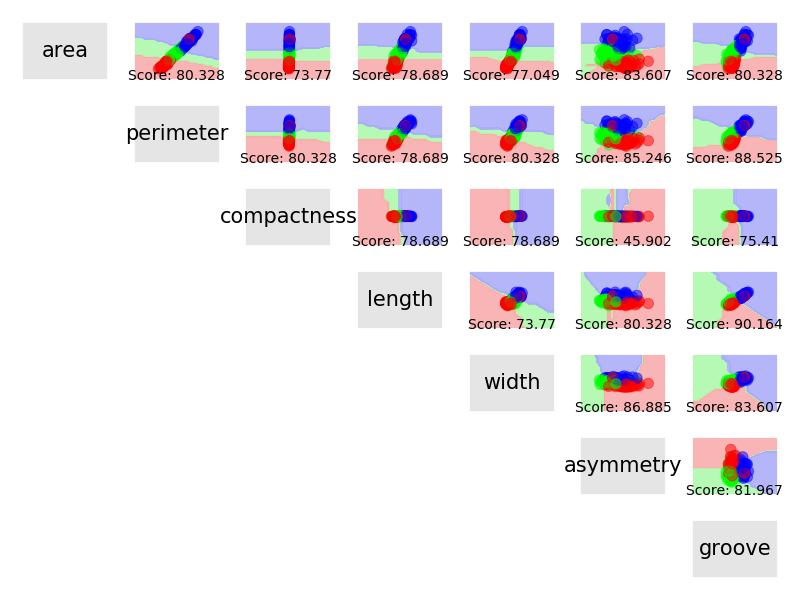

C:\Users\Prashant\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Max 2D Score:  90.164


In [50]:
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

<IPython.core.display.Javascript object>


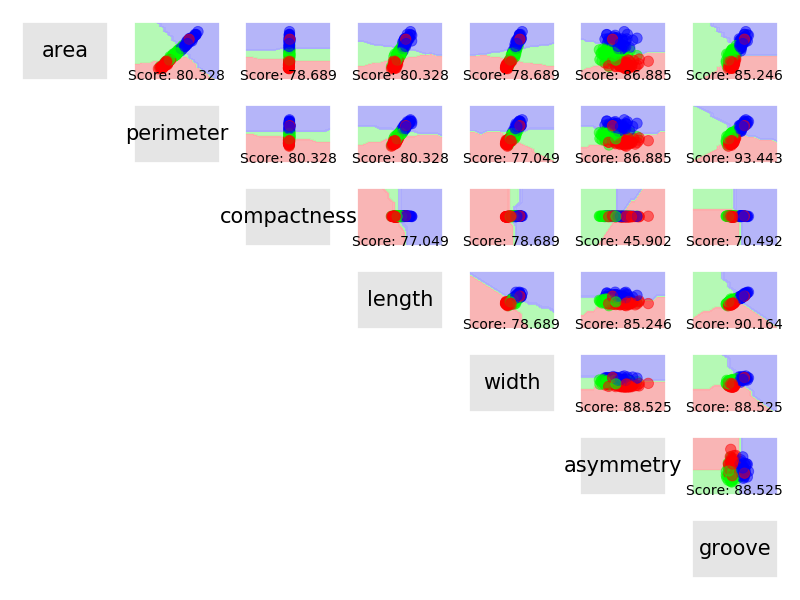

C:\Users\Prashant\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Max 2D Score:  93.443


In [45]:
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

<IPython.core.display.Javascript object>


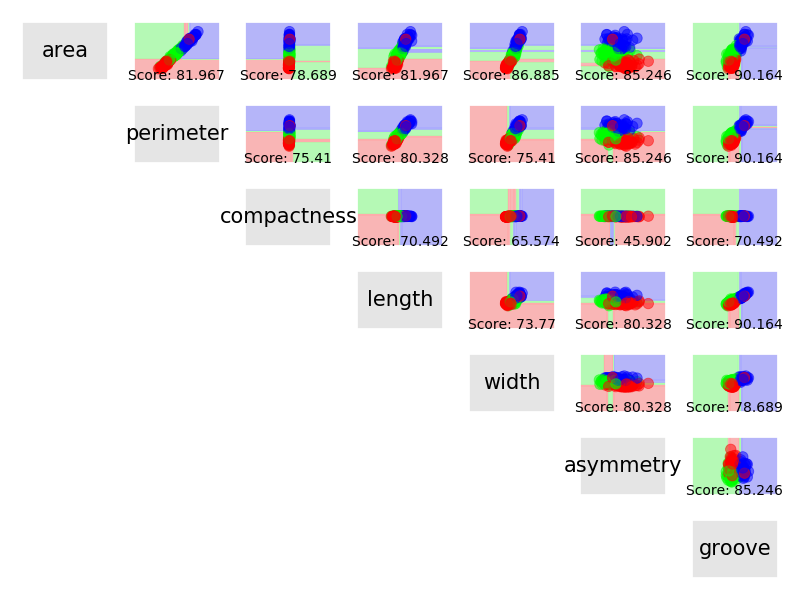

C:\Users\Prashant\Anaconda2\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Max 2D Score:  90.164


In [46]:
drawPlots(dt, X_train, X_test, y_train, y_test, 'Decision Trees')

In [47]:
#
# BONUS: After submitting your answers, toy around with
# gamma, kernel, and C.